# Task-18A

 Please provide a Pivot table and find the total sale amount region-wise, manager-wise. Then simply visualize it, please.



In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Getting data
sales = pd.read_excel('SaleData.xlsx')
sales.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0


In [ ]:
sales.info()  # information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderDate   43 non-null     datetime64[ns]
 1   Region      43 non-null     object        
 2   Manager     43 non-null     object        
 3   SalesMan    43 non-null     object        
 4   Item        43 non-null     object        
 5   Units       45 non-null     float64       
 6   Unit_price  45 non-null     float64       
 7   Sale_amt    45 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.9+ KB


In [ ]:
sales.pivot_table('Sale_amt', index=None, columns=['Region','Manager'], aggfunc='sum') #creating pivot table

Region     Central                      ...      East     West         
Manager    Douglas   Hermann    Martha  ...    Martha  Douglas  Timothy
Sale_amt  124016.0  365108.5  199690.0  ...  272803.0  66836.0  88063.0

[1 rows x 8 columns]

In [ ]:
sales.pivot_table('Sale_amt', index=None, columns='Region') # for the region-wise sale amount

Region,Central,East,West
Sale_amt,34573.729167,24692.846154,25816.5


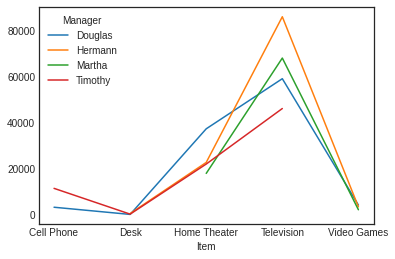

In [ ]:
sales.pivot_table('Sale_amt', index='Item', columns='Manager').plot() # plot for sale amount according to manager

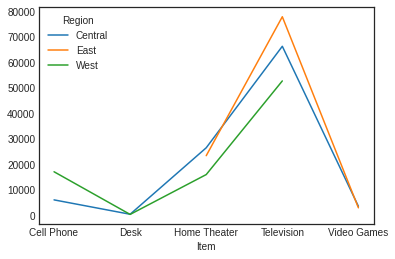

In [ ]:
sales.pivot_table('Sale_amt', index='Item', columns='Region').plot() # this time according to region

In [ ]:
sales.pivot_table('Sale_amt', index='Region', columns='Manager')

Manager,Douglas,Hermann,Martha,Timothy
Region,,,,
Central,41338.666667,30425.708333,49922.5,28191.00
East,16068.000000,NaN,27280.3,NaN
West,33418.000000,NaN,NaN,22015.75


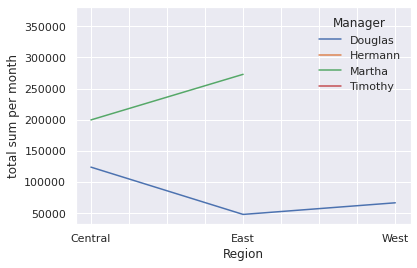

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
sales.pivot_table('Sale_amt', index='Region', columns='Manager', aggfunc='sum').plot()
plt.ylabel('total sum per month');

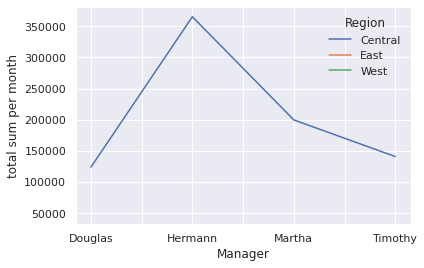

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
sales.pivot_table('Sale_amt', index='Manager', columns='Region', aggfunc='sum').plot()
plt.ylabel('total sum per month');

# Task-18B

 Please provide a Pivot table and find the item-wise unit sold. Then simply visualize it, please.

In [ ]:
sales.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0


In [ ]:
sales_unit = sales.pivot_table(sales, index='Item', columns=None, aggfunc=['sum']) # pivot table
sales_unit

sum                  
              Sale_amt Unit_price  Units
Item                                    
Cell Phone     62550.0     1125.0  278.0
Desk            1250.0      375.0   10.0
Home Theater  361000.0     7500.0  722.0
Television    857768.0    15574.0  716.0
Video Games    23107.5      409.5  395.0

In [ ]:
sales.pivot_table('Units',index='Item',aggfunc='sum')

,Units
Item,
Cell Phone,278.0
Desk,10.0
Home Theater,722.0
Television,716.0
Video Games,395.0


In [ ]:
sales['Item'].unique()

array(['Television', 'Home Theater', 'Cell Phone', 'Desk', 'Video Games',
       nan], dtype=object)

Text(0, 0.5, 'Units sold for every item')

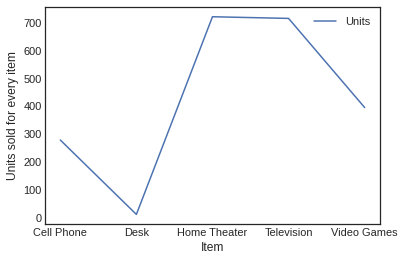

In [ ]:
sales.pivot_table('Units',index='Item',aggfunc='sum').plot()
plt.ylabel('Units sold for every item')

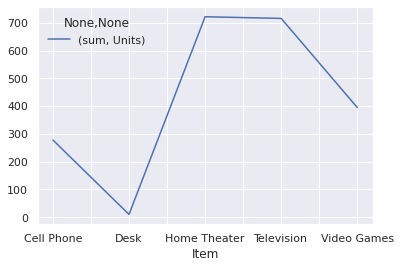

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
sales.pivot_table('Units', index='Item', columns=None, aggfunc=['sum']).plot()   # almost samegraphs
#plt.ylabel('total sum per month');

#Task-18C

 Please provide a Pivot table and count the manager-wise sale and mean value of sale amount. Then simply visualize it, please.


I tried multiple things in this question

In [ ]:
sales.pivot_table('Sale_amt', index='Manager', columns=None, aggfunc=('mean'))
 # mean sale amount for every manager

,Sale_amt
Manager,
Douglas,29882.000000
Hermann,30425.708333
Martha,33749.500000
Timothy,25446.444444


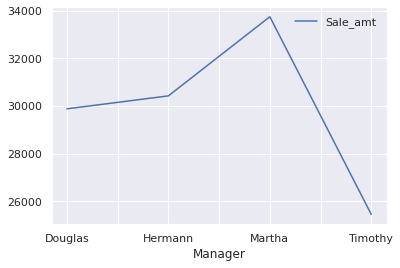

In [ ]:
sales.pivot_table('Sale_amt', index='Manager', columns=None, aggfunc=('mean')).plot()

In [ ]:
sales.pivot_table('Units', index='Manager', columns=None, aggfunc=['mean','count'])

,mean,count
,Units,Units
Manager,,
Douglas,51.875000,8
Hermann,53.916667,12
Martha,50.285714,14
Timothy,39.444444,9


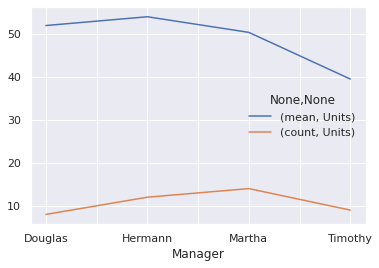

In [ ]:
sales.pivot_table('Units', index='Manager', columns=None, aggfunc=['mean','count']).plot()

In [ ]:
sales.pivot_table('Item', index='Manager', columns=None, aggfunc=('count')) # item count for every manager

,Item
Manager,
Douglas,8
Hermann,12
Martha,14
Timothy,9


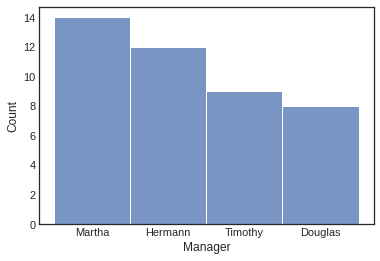

In [ ]:
sns.histplot(data=sales, x="Manager") # this plot item count for every manager

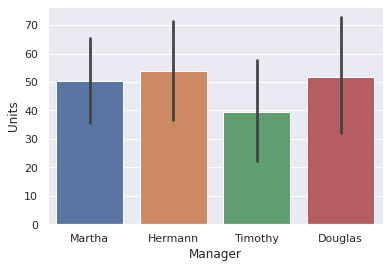

In [ ]:
sns.barplot(x="Manager", y="Units", data=sales) # unitsolds for every manager

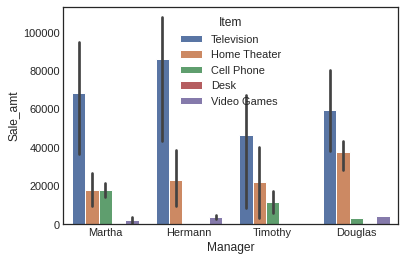

In [ ]:
sns.barplot(x="Manager", y="Sale_amt", hue="Item", data=sales)

In [ ]:
sales.pivot_table('Sale_amt', index='Manager', columns='Item', aggfunc=('sum','mean'),fill_value=0)

mean                     ...          sum                       
Item    Cell Phone Desk  Home Theater  ... Home Theater Television Video Games
Manager                                ...                                    
Douglas     3375.0  250  37500.000000  ...       112500     118602      4329.0
Hermann        0.0  625  22875.000000  ...        91500     258768     14215.5
Martha     18000.0    0  18100.000000  ...        90500     341430      4563.0
Timothy    11587.5  375  22166.666667  ...        66500     138968         0.0

[4 rows x 10 columns]

In [ ]:
sales.pivot_table('Sale_amt', index='Manager', columns=None, aggfunc=('sum','mean'),fill_value=0) # mean and sum values where indexes are managers

,mean,sum
Manager,,
Douglas,29882.000000,239056.0
Hermann,30425.708333,365108.5
Martha,33749.500000,472493.0
Timothy,25446.444444,229018.0


In [ ]:
sales.pivot_table('Sale_amt', index='Manager', columns=None, aggfunc=('mean','count'),fill_value=0)
 # mean and count values just expected in the question

,count,mean
Manager,,
Douglas,8,29882.000000
Hermann,12,30425.708333
Martha,14,33749.500000
Timothy,9,25446.444444


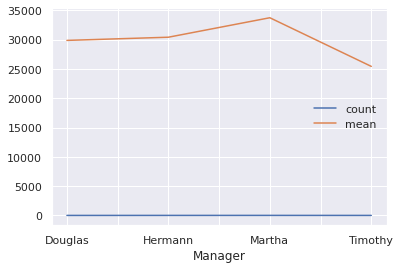

In [ ]:
sales.pivot_table('Sale_amt', index='Manager', columns=None, aggfunc=('mean','count'),fill_value=0).plot()

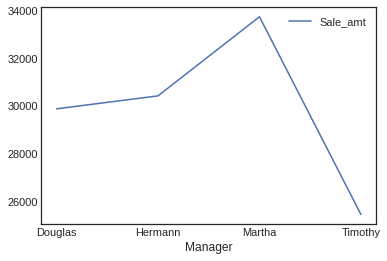

In [ ]:
sales.pivot_table('Sale_amt', index='Manager', columns=None, aggfunc=('mean')).plot()
 # this is mean values for every manager

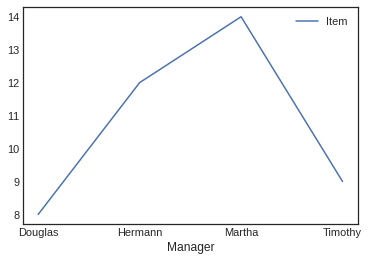

In [ ]:
sales.pivot_table('Item', index='Manager', columns=None, aggfunc=('count')).plot() #item count

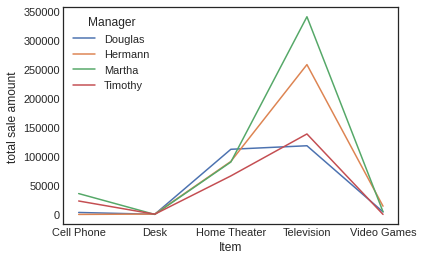

In [ ]:
sales.pivot_table('Sale_amt', index='Item', columns='Manager', aggfunc=('sum'), fill_value=0).plot() #sale_amount according to manager including items
plt.ylabel('total sale amount ');